In [3]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'clean_df.csv'
df = pd.read_csv(path)

In [5]:
df.to_csv('module_5_auto.csv')

In [7]:
# First let's only use numeric data
df=df._get_numeric_data()
df.head()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,...,111,5000.0,21,8.703704,13495.0,11.190476,False,True,True,False
1,1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,...,111,5000.0,21,8.703704,16500.0,11.190476,False,True,True,False
2,2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,...,154,5000.0,19,9.038462,16500.0,12.368421,False,True,True,False
3,3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,...,102,5500.0,24,7.833333,13950.0,9.791667,False,True,True,False
4,4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,...,115,5500.0,18,10.681818,17450.0,13.055556,False,True,True,False


In [9]:
# Functions for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [89]:
# Defination of functions that will be used to create various plots
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)
    # Without ax=ax1, the plot would be in a different figure
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

In [13]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [18]:
# Training and testing
# place the target data price in a separate dataframe y_data
y_data = df['price']

In [20]:
x_data=df.drop('price',axis=1)

In [24]:
# randomly split the data into training and testing data using the function train_test_split.
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [27]:
# the test data consists of 40% of the dataset and it is not randomly split
x_train1 , x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)


In [30]:
from sklearn.linear_model import LinearRegression

In [34]:
lre=LinearRegression()

In [36]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [39]:
lre.score(x_test[['horsepower']], y_test)

0.3635480624962413

In [42]:
lre.score(x_train[['horsepower']], y_train)

0.662028747521533

In [ ]:
# the R^2 is much smaller using the test data compared to the training data.

In [47]:
# the R^2 on the test data using 40% of the dataset for testing
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139737368233015

In [51]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

In [57]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [60]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220592359225414 and the standard deviation is 0.29130480666118436


In [63]:
# For higher scores covention becaude MSE is a low function by default
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20251357.7835463 , 43743920.05390439, 12525158.34507633,
       17564549.69976653])

In [67]:
# the average R^2 using two folds and the average R^2 for the second fold utilizing the "horsepower" feature
Rscore_2 = cross_val_score(lre, x_data[["horsepower"]], y_data, cv=2)
Rscore_2.mean()

0.516835099979672

In [70]:
from sklearn.model_selection import cross_val_predict

In [73]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

In [77]:
# Overfitting, Underfitting and Model Selection
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_train)

LinearRegression()

In [80]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
yhat_train[0:5]

array([ 7625.80349764, 28447.913572  , 14843.22185221,  3855.72028472,
       34567.84349196])

In [84]:
# Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
yhat_test[0:5]

array([11043.92953392,  5844.12954446, 11258.50532848,  6886.86402714,
       15325.73021747])

/home/mukiiri/Downloads/home/mukiiri/Documents/pandas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mukiiri/Downloads/home/mukiiri/Documents/pandas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


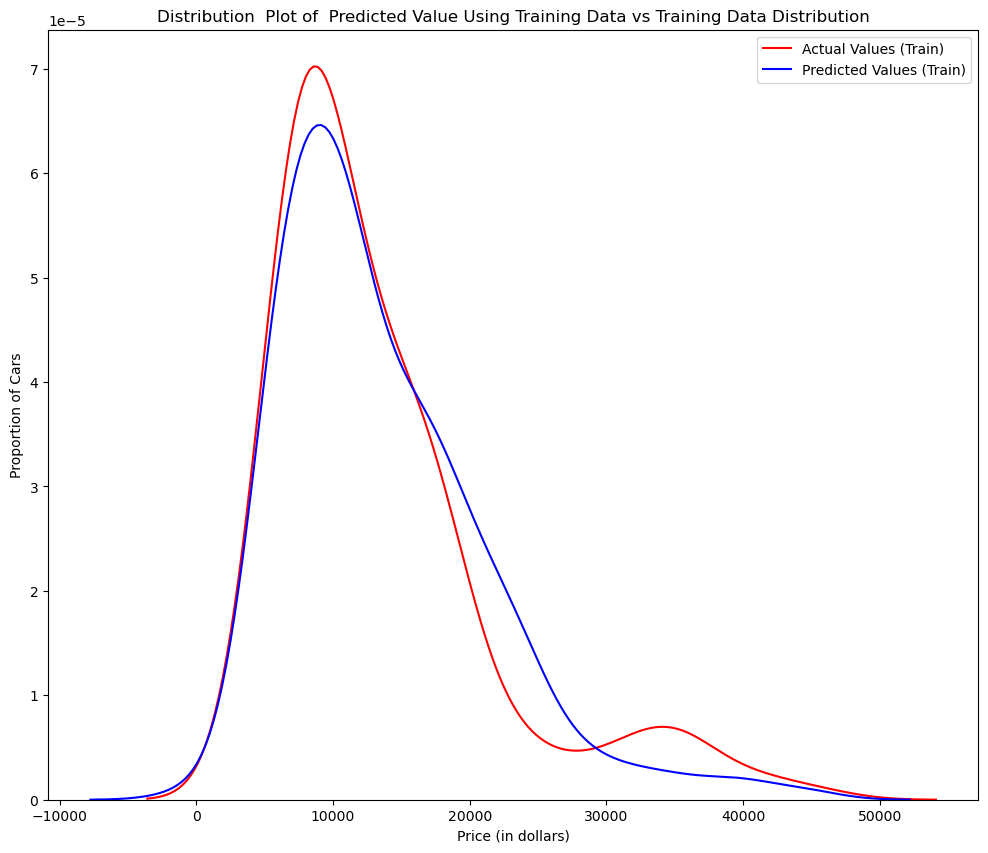

In [91]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/home/mukiiri/Downloads/home/mukiiri/Documents/pandas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mukiiri/Downloads/home/mukiiri/Documents/pandas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


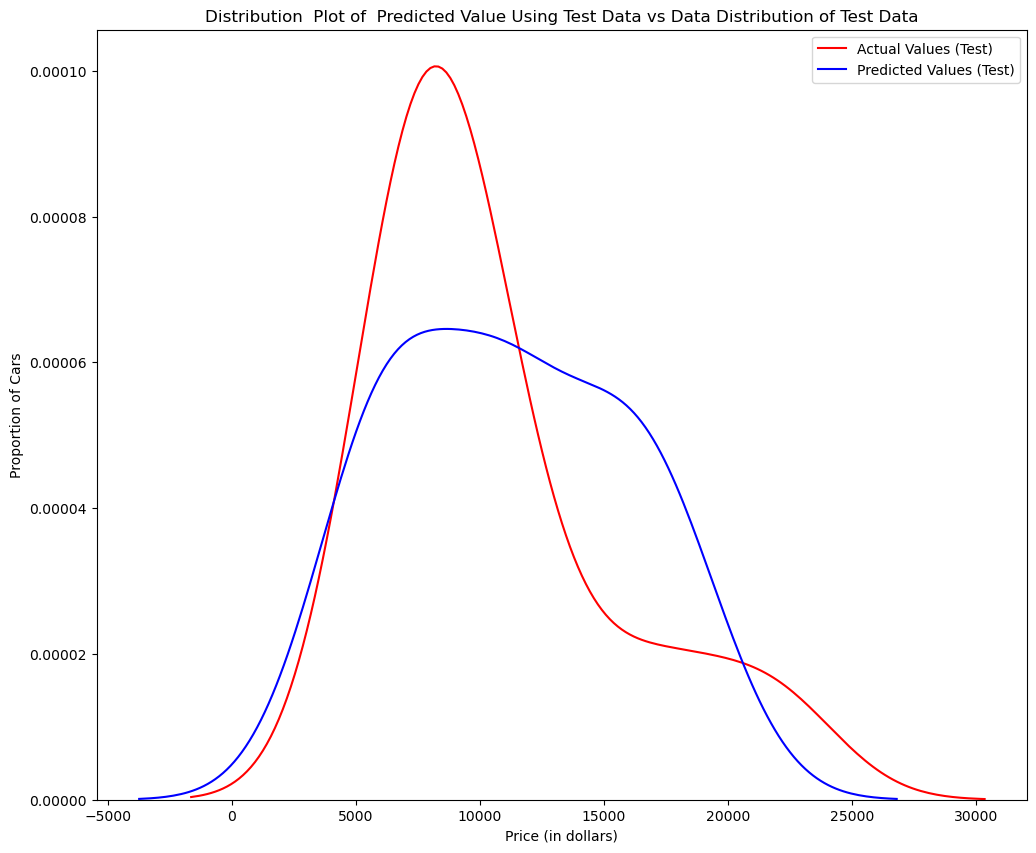

In [94]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [97]:
from sklearn.preprocessing import PolynomialFeatures
# Use Polynomial regression to see if it exhibits similar behavior

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [103]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [106]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [109]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6727.5684937 ,  7306.69841686, 12213.71328834, 18895.0377327 ,
       19996.83929633])

In [112]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6727.5684937   7306.69841686 12213.71328834 18895.0377327 ]
True values: [ 6295. 10698. 13860. 13499.]


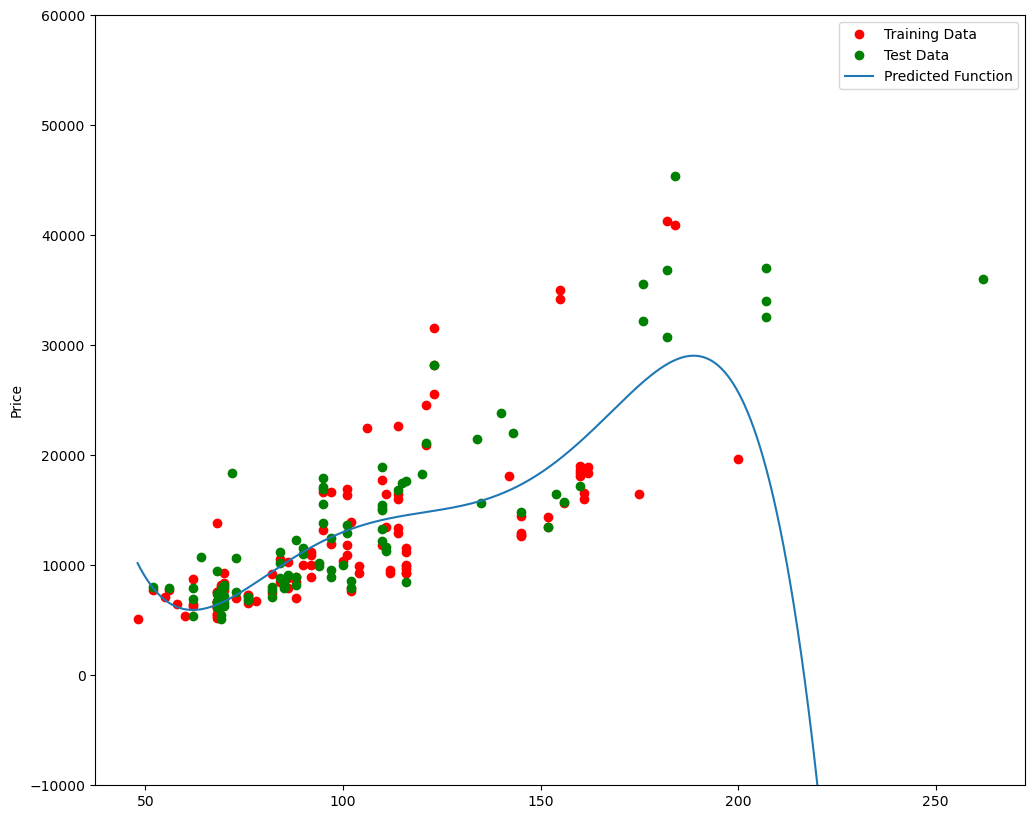

In [115]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [118]:
poly.score(x_train_pr, y_train)

0.5568527854053474

In [124]:
poly.score(x_test_pr, y_test)
#  A negative R^2 is a sign of overfitting.

-29.815481910638443

Text(0.5, 1.0, 'R^2 Using Test Data')

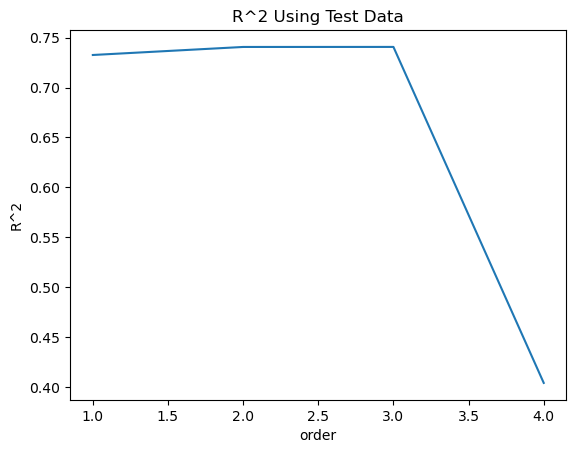

In [128]:
# R^2 changes on the test data for different order polynomials
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
# plt.text(3, 0.75, 'Maximum R^2 ')  

In [131]:
# Polynomial feature with more than one feature
pr1 = PolynomialFeatures(degree=2)

In [134]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])

In [137]:
# We used 55% of the data for training
x_train_pr1.shape

(110, 15)

In [140]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

/home/mukiiri/Downloads/home/mukiiri/Documents/pandas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mukiiri/Downloads/home/mukiiri/Documents/pandas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


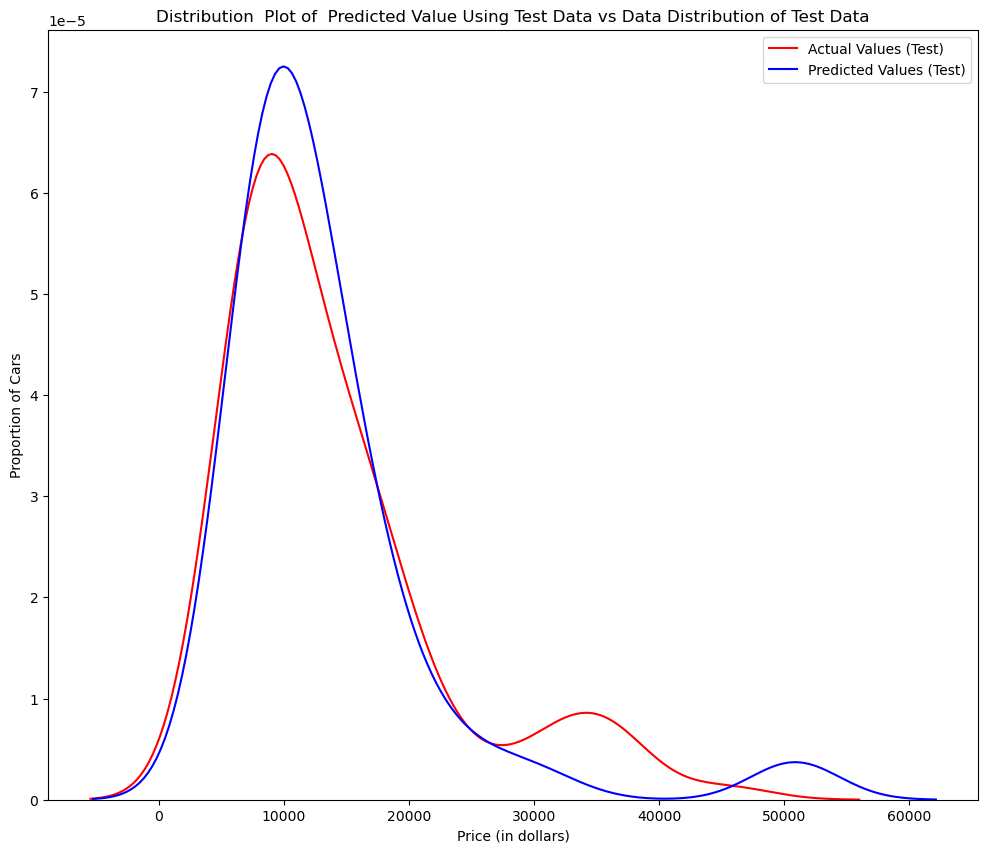

In [143]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [146]:
#The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

In [150]:
# Ridge Regression
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km','normalized-losses','symboling']])

In [153]:
from sklearn.linear_model import Ridge

In [156]:
RigeModel=Ridge(alpha=1)

In [159]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [162]:
yhat = RigeModel.predict(x_test_pr)

In [173]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 5501.44956318 10293.72326631 21646.0971684  19329.3421769 ]
test set : [ 6295. 10698. 13860. 13499.]


In [178]:
# We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:06<00:00, 161.46it/s, Test Score=0.673, Train Score=0.86]


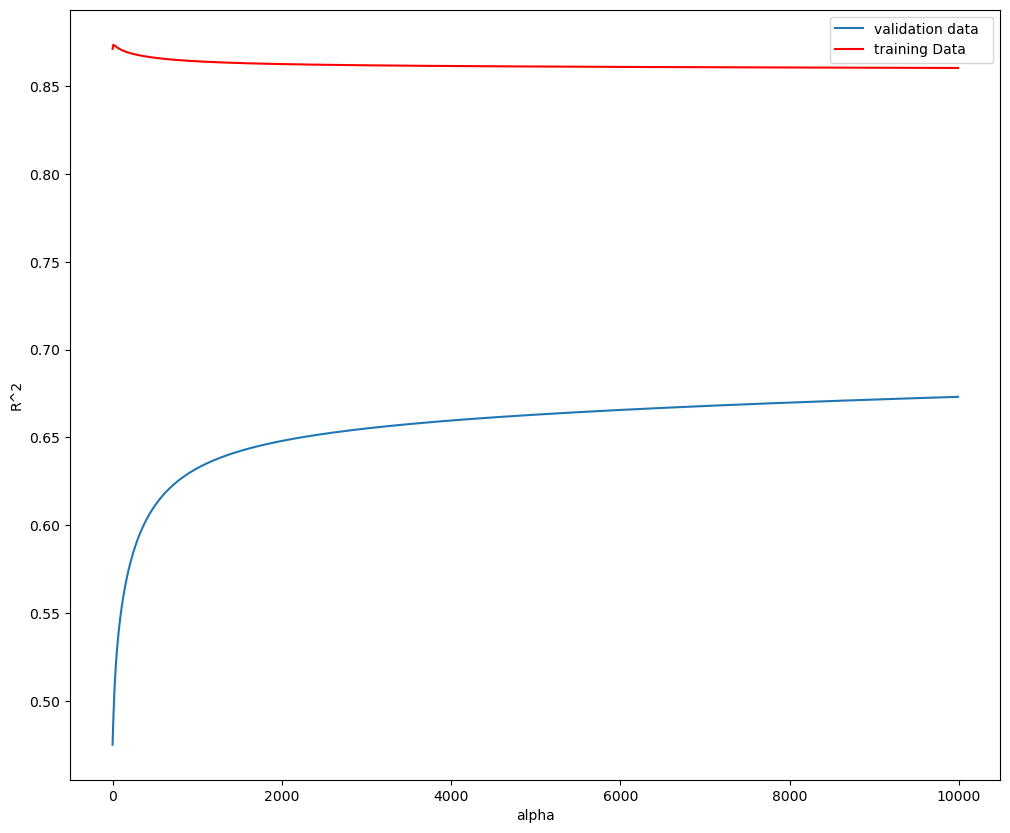

In [182]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [186]:
# The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

#Here the model is built and tested on the same data, so the training and test data are the same.

#The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

#The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


In [189]:
# Performing Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.
RidgeModel_1 = Ridge(alpha=10)
RidgeModel_1.fit(x_train_pr, y_train)
RidgeModel_1.score(x_test_pr, y_test)

0.4905348461839443

In [195]:
# Grid Search
from sklearn.model_selection import GridSearchCV

In [198]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [201]:
RR=Ridge()
RR

Ridge()

In [204]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [207]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [210]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [213]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_test)

0.8411508430484375

In [217]:
# Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_data)

Ridge(alpha=10000)